In [1]:
# SEKCJA 1: Import bibliotek i wczytanie danych

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Ustawienia wizualizacji
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Biblioteki załadowane!")
print(f"📅 Data analizy: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

# Wczytaj dane
df = pd.read_csv('../data/material_handlers_training.csv')

# ✅ KLUCZOWE: Oblicz AGE automatycznie z YEAR
current_year = 2025
df['age'] = current_year - df['year']

print(f"\n📊 Wczytano {len(df)} obserwacji")
print(f"📋 Liczba kolumn: {len(df.columns)}")
print(f"✅ Automatycznie obliczono kolumnę 'age' z 'year'")
print("\n🔍 Pierwsze 3 wiersze:")
print(df[['model', 'year', 'age', 'hours', 'condition', 'price']].head(3))

✅ Biblioteki załadowane!
📅 Data analizy: 2025-10-05 18:32

📊 Wczytano 543 obserwacji
📋 Liczba kolumn: 19
✅ Automatycznie obliczono kolumnę 'age' z 'year'

🔍 Pierwsze 3 wiersze:
   model  year  age  hours     condition   price
0  160MH  2021    4   3064         Dobry  343000
1  160MH  2021    4   3071  Zadowalający  311000
2  160MH  2016    9  10905  Bardzo dobry  207000


In [2]:
# SEKCJA 2: Podstawowe statystyki

print("=" * 80)
print("📊 PODSTAWOWE STATYSTYKI DANYCH")
print("=" * 80)

# Informacje ogólne
print(f"\n📈 Zakres dat: {df['year'].min()} - {df['year'].max()}")
print(f"📈 Zakres wieku: {df['age'].min()} - {df['age'].max()} lat")
print(f"📈 Zakres motogodzin: {df['hours'].min():,} - {df['hours'].max():,} godz")
print(f"💰 Zakres cen: {df['price'].min():,} - {df['price'].max():,} zł")

# Statystyki numeryczne
print("\n📊 STATYSTYKI CEN:")
print(f"  Średnia:     {df['price'].mean():>12,.0f} zł")
print(f"  Mediana:     {df['price'].median():>12,.0f} zł")
print(f"  Odch. std:   {df['price'].std():>12,.0f} zł")
print(f"  Q1 (25%):    {df['price'].quantile(0.25):>12,.0f} zł")
print(f"  Q3 (75%):    {df['price'].quantile(0.75):>12,.0f} zł")

# Rozkłady kategoryczne
print("\n📊 ROZKŁAD WG MODELI:")
print(df['model'].value_counts().sort_index())

print("\n📊 ROZKŁAD WG STANU:")
for condition in ['Doskonały', 'Bardzo dobry', 'Dobry', 'Zadowalający', 'Wymaga naprawy']:
    count = len(df[df['condition'] == condition])
    pct = count / len(df) * 100
    print(f"  {condition:20s}: {count:3d} ({pct:5.1f}%)")

# Braki danych
print("\n🔍 SPRAWDZANIE BRAKÓW DANYCH:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("  ✅ Brak braków danych - wszystkie komórki wypełnione!")
else:
    print("  ⚠️ Znaleziono braki:")
    print(missing[missing > 0])

# Duplikaty
duplicates = df.duplicated().sum()
print(f"\n🔍 DUPLIKATY: {duplicates}")
if duplicates == 0:
    print("  ✅ Brak duplikatów")
else:
    print(f"  ⚠️ Znaleziono {duplicates} duplikatów")

print("\n" + "=" * 80)

📊 PODSTAWOWE STATYSTYKI DANYCH

📈 Zakres dat: 2010 - 2024
📈 Zakres wieku: 1 - 15 lat
📈 Zakres motogodzin: 745 - 24,705 godz
💰 Zakres cen: 90,000 - 1,152,000 zł

📊 STATYSTYKI CEN:
  Średnia:          364,902 zł
  Mediana:          337,000 zł
  Odch. std:        167,084 zł
  Q1 (25%):         242,500 zł
  Q3 (75%):         454,000 zł

📊 ROZKŁAD WG MODELI:
model
160MH         56
180MH         55
200MH         51
200MH ACCU    57
250MH         50
270MH         59
300MH         51
350MH         53
400MH         60
520MH         51
Name: count, dtype: int64

📊 ROZKŁAD WG STANU:
  Doskonały           : 112 ( 20.6%)
  Bardzo dobry        : 110 ( 20.3%)
  Dobry               : 110 ( 20.3%)
  Zadowalający        : 102 ( 18.8%)
  Wymaga naprawy      : 109 ( 20.1%)

🔍 SPRAWDZANIE BRAKÓW DANYCH:
  ✅ Brak braków danych - wszystkie komórki wypełnione!

🔍 DUPLIKATY: 0
  ✅ Brak duplikatów



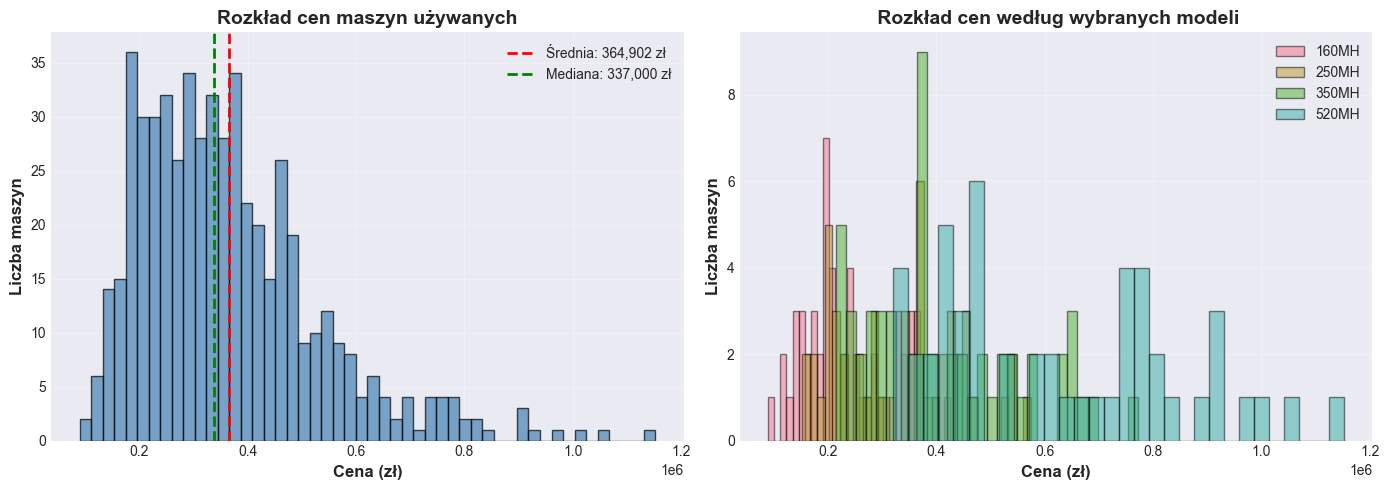

✅ Wykresy wygenerowane!

💡 WNIOSKI:
  • Większość maszyn w przedziale: 242,500 - 454,000 zł
  • Rozkład lekko skośny w prawo


In [3]:
# SEKCJA 3: Rozkład cen - histogram

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram 1: Wszystkie ceny
axes[0].hist(df['price'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Średnia: {df["price"].mean():,.0f} zł')
axes[0].axvline(df['price'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["price"].median():,.0f} zł')
axes[0].set_xlabel('Cena (zł)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Liczba maszyn', fontsize=12, fontweight='bold')
axes[0].set_title('Rozkład cen maszyn używanych', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histogram 2: Ceny według modeli (stackowane)
models_to_plot = ['160MH', '250MH', '350MH', '520MH']
for model in models_to_plot:
    model_data = df[df['model'] == model]['price']
    axes[1].hist(model_data, bins=30, alpha=0.5, label=model, edgecolor='black')

axes[1].set_xlabel('Cena (zł)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Liczba maszyn', fontsize=12, fontweight='bold')
axes[1].set_title(' Rozkład cen według wybranych modeli', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Wykresy wygenerowane!")
print(f"\n💡 WNIOSKI:")
print(f"  • Większość maszyn w przedziale: {df['price'].quantile(0.25):,.0f} - {df['price'].quantile(0.75):,.0f} zł")
print(f"  • Rozkład {'lekko skośny w prawo' if df['price'].skew() > 0 else 'symetryczny'}")

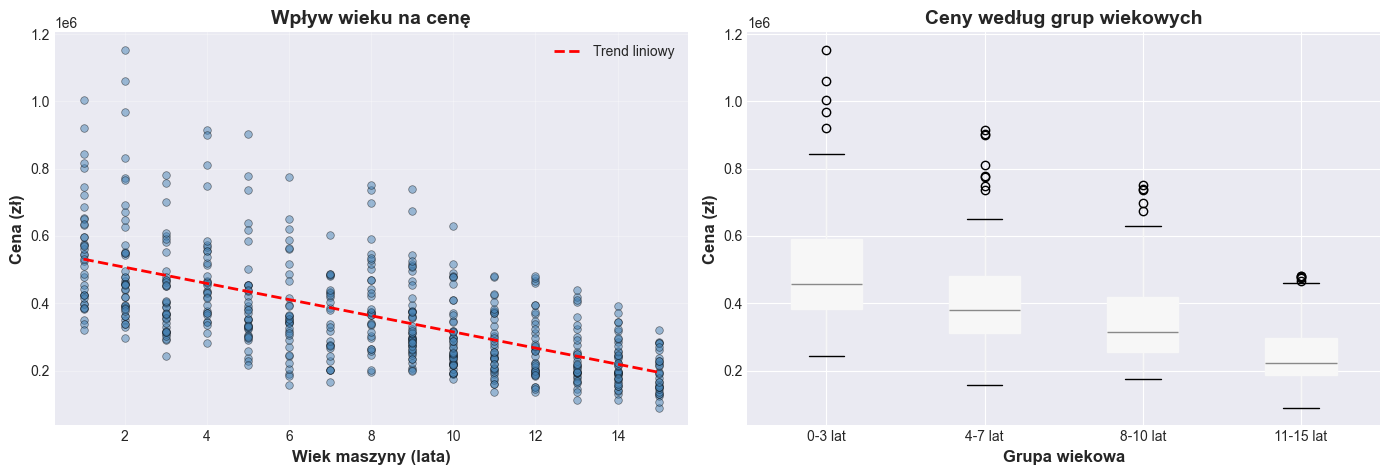


 ŚREDNIE CENY WEDŁUG WIEKU:
  0-3 lat     :      507,103 zł  (n=117)
  4-7 lat     :      410,078 zł  (n=129)
  8-10 lat    :      349,935 zł  (n=123)
  11-15 lat   :      246,374 zł  (n=174)

 Korelacja wiek-cena: -0.619
 Interpretacja: Średnia ujemna
   (Im starsze, tym tańsze - korelacja 61.9%)



In [4]:
# SEKCJA 4: Jak wiek wpływa na cenę?

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Wiek vs Cena
axes[0].scatter(df['age'], df['price'], alpha=0.5, s=30, c='steelblue', edgecolors='black', linewidth=0.5)

# Linia trendu
z = np.polyfit(df['age'], df['price'], 1)
p = np.poly1d(z)
axes[0].plot(df['age'].sort_values(), p(df['age'].sort_values()), 
             "r--", linewidth=2, label='Trend liniowy')

axes[0].set_xlabel('Wiek maszyny (lata)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cena (zł)', fontsize=12, fontweight='bold')
axes[0].set_title('Wpływ wieku na cenę', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot: Cena według grup wiekowych
df['age_group'] = pd.cut(df['age'], bins=[0, 3, 7, 10, 15], labels=['0-3 lat', '4-7 lat', '8-10 lat', '11-15 lat'])
df.boxplot(column='price', by='age_group', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Grupa wiekowa', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cena (zł)', fontsize=12, fontweight='bold')
axes[1].set_title('Ceny według grup wiekowych', fontsize=14, fontweight='bold')
axes[1].get_figure().suptitle('')  # Usuń domyślny tytuł

plt.tight_layout()
plt.show()

# Analiza numeryczna
print("\n ŚREDNIE CENY WEDŁUG WIEKU:")
print("=" * 60)
for age_group in df['age_group'].cat.categories:
    avg_price = df[df['age_group'] == age_group]['price'].mean()
    count = len(df[df['age_group'] == age_group])
    print(f"  {age_group:12s}: {avg_price:>12,.0f} zł  (n={count})")

# Korelacja
corr_age_price = df['age'].corr(df['price'])
print(f"\n Korelacja wiek-cena: {corr_age_price:.3f}")
print(f" Interpretacja: {'Silna ujemna' if corr_age_price < -0.7 else 'Średnia ujemna' if corr_age_price < -0.4 else 'Słaba ujemna'}")
print(f"   (Im starsze, tym tańsze - korelacja {abs(corr_age_price):.1%})")

print("\n" + "=" * 60)

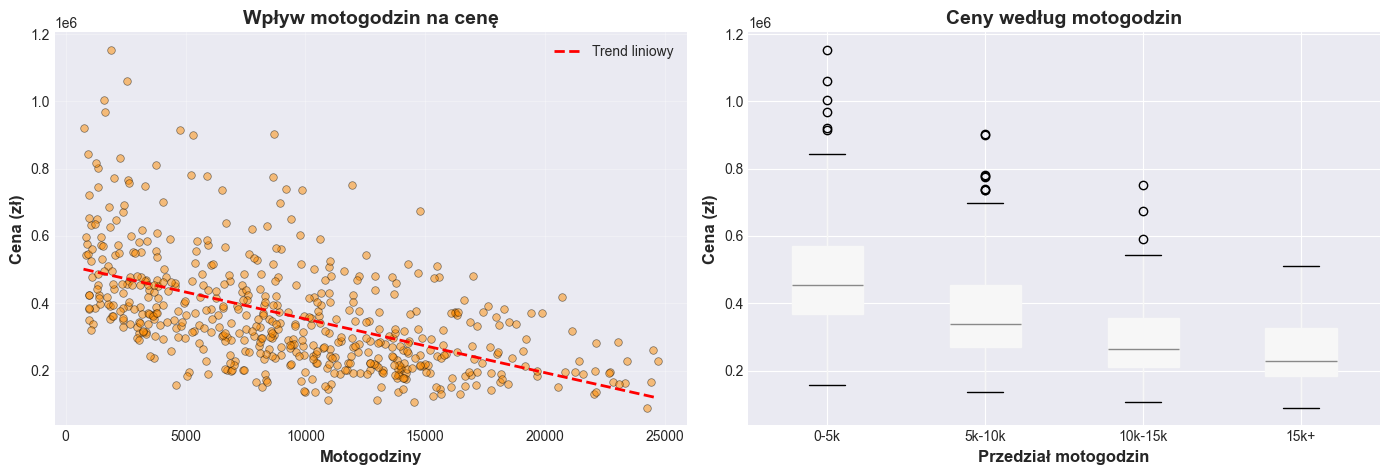


 ŚREDNIE CENY WEDŁUG MOTOGODZIN:
  0-5k        :      487,941 zł  (n=152)
  5k-10k      :      374,899 zł  (n=159)
  10k-15k     :      292,628 zł  (n=145)
  15k+        :      252,126 zł  (n=87)

 Korelacja motogodziny-cena: -0.537
 Interpretacja: Średnia ujemna
   (Im więcej godzin, tym tańsze - korelacja 53.7%)



In [5]:
# SEKCJA 5: Jak motogodziny wpływają na cenę?

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Motogodziny vs Cena
axes[0].scatter(df['hours'], df['price'], alpha=0.5, s=30, c='darkorange', edgecolors='black', linewidth=0.5)

# Linia trendu
z = np.polyfit(df['hours'], df['price'], 1)
p = np.poly1d(z)
axes[0].plot(df['hours'].sort_values(), p(df['hours'].sort_values()), 
             "r--", linewidth=2, label='Trend liniowy')

axes[0].set_xlabel('Motogodziny', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cena (zł)', fontsize=12, fontweight='bold')
axes[0].set_title('Wpływ motogodzin na cenę', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot: Cena według przedziałów motogodzin
df['hours_group'] = pd.cut(df['hours'], bins=[0, 5000, 10000, 15000, 25000], 
                            labels=['0-5k', '5k-10k', '10k-15k', '15k+'])
df.boxplot(column='price', by='hours_group', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Przedział motogodzin', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cena (zł)', fontsize=12, fontweight='bold')
axes[1].set_title('Ceny według motogodzin', fontsize=14, fontweight='bold')
axes[1].get_figure().suptitle('')

plt.tight_layout()
plt.show()

# Analiza numeryczna
print("\n ŚREDNIE CENY WEDŁUG MOTOGODZIN:")
print("=" * 60)
for hours_group in df['hours_group'].cat.categories:
    avg_price = df[df['hours_group'] == hours_group]['price'].mean()
    count = len(df[df['hours_group'] == hours_group])
    print(f"  {hours_group:12s}: {avg_price:>12,.0f} zł  (n={count})")

# Korelacja
corr_hours_price = df['hours'].corr(df['price'])
print(f"\n Korelacja motogodziny-cena: {corr_hours_price:.3f}")
print(f" Interpretacja: {'Silna ujemna' if corr_hours_price < -0.7 else 'Średnia ujemna' if corr_hours_price < -0.4 else 'Słaba ujemna'}")
print(f"   (Im więcej godzin, tym tańsze - korelacja {abs(corr_hours_price):.1%})")

print("\n" + "=" * 60)

/var/folders/qm/2fc1nfl13_d0bf3yc5nl48b00000gn/T/ipykernel_2118/2701131846.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='condition', y='price', ax=axes[1], palette='Set2')


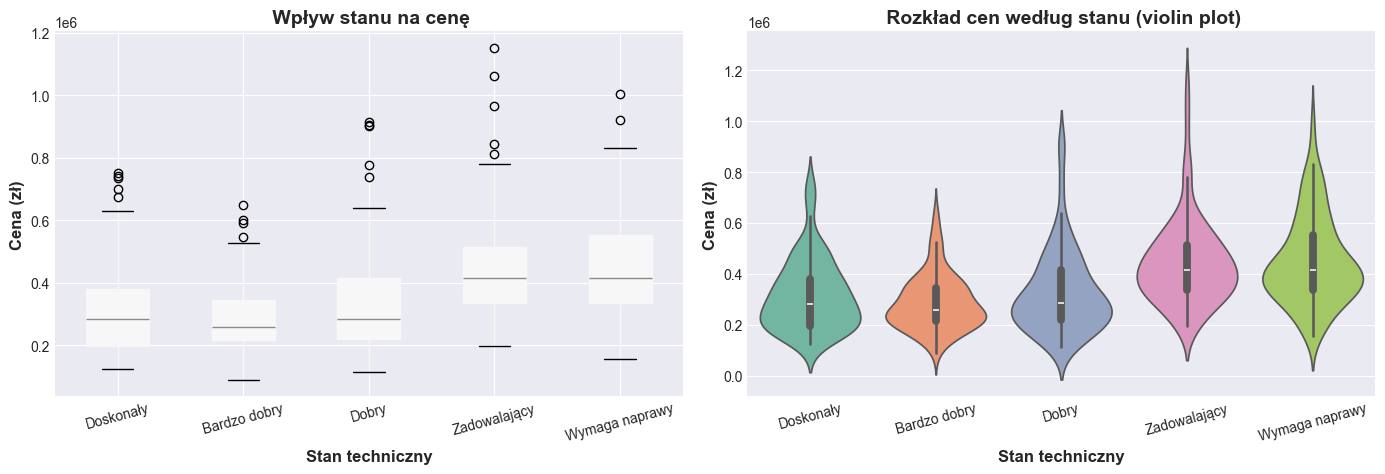


 ŚREDNIE CENY WEDŁUG STANU TECHNICZNEGO:
  Doskonały           :      318,545 zł  (📉 -12.7%,  n=112)
  Bardzo dobry        :      288,409 zł  (📉 -21.0%,  n=110)
  Dobry               :      329,955 zł  (📉  -9.6%,  n=110)
  Zadowalający        :      444,382 zł  (📈 +21.8%,  n=102)
  Wymaga naprawy      :      450,624 zł  (📈 +23.5%,  n=109)

  Baseline (średnia ogólna):      364,902 zł

 KLUCZOWY WNIOSEK:
   Różnica między stanem 'Doskonały' a 'Wymaga naprawy': -132,079 zł (-29%)
   Stan techniczny ma OGROMNY wpływ na cenę!



In [6]:
# SEKCJA 6: Jak stan techniczny wpływa na cenę?

# Uporządkuj kategorie stanu
condition_order = ['Doskonały', 'Bardzo dobry', 'Dobry', 'Zadowalający', 'Wymaga naprawy']
df['condition'] = pd.Categorical(df['condition'], categories=condition_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='price', by='condition', ax=axes[0], patch_artist=True)
axes[0].set_xlabel('Stan techniczny', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cena (zł)', fontsize=12, fontweight='bold')
axes[0].set_title(' Wpływ stanu na cenę', fontsize=14, fontweight='bold')
axes[0].get_figure().suptitle('')
axes[0].tick_params(axis='x', rotation=15)

# Violin plot (alternatywny sposób)
sns.violinplot(data=df, x='condition', y='price', ax=axes[1], palette='Set2')
axes[1].set_xlabel('Stan techniczny', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cena (zł)', fontsize=12, fontweight='bold')
axes[1].set_title(' Rozkład cen według stanu (violin plot)', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# Analiza numeryczna
print("\n ŚREDNIE CENY WEDŁUG STANU TECHNICZNEGO:")
print("=" * 60)
baseline_price = df['price'].mean()

for condition in condition_order:
    condition_df = df[df['condition'] == condition]
    avg_price = condition_df['price'].mean()
    count = len(condition_df)
    diff = avg_price - baseline_price
    diff_pct = (diff / baseline_price) * 100
    
    symbol = "📈" if diff > 0 else "📉"
    print(f"  {condition:20s}: {avg_price:>12,.0f} zł  ({symbol} {diff_pct:+5.1f}%,  n={count})")

print(f"\n  Baseline (średnia ogólna): {baseline_price:>12,.0f} zł")

# Różnica między najlepszym a najgorszym
best = df[df['condition'] == 'Doskonały']['price'].mean()
worst = df[df['condition'] == 'Wymaga naprawy']['price'].mean()
diff = best - worst
diff_pct = (diff / worst) * 100

print(f"\n KLUCZOWY WNIOSEK:")
print(f"   Różnica między stanem 'Doskonały' a 'Wymaga naprawy': {diff:,.0f} zł ({diff_pct:.0f}%)")
print(f"   Stan techniczny ma OGROMNY wpływ na cenę!")

print("\n" + "=" * 60)

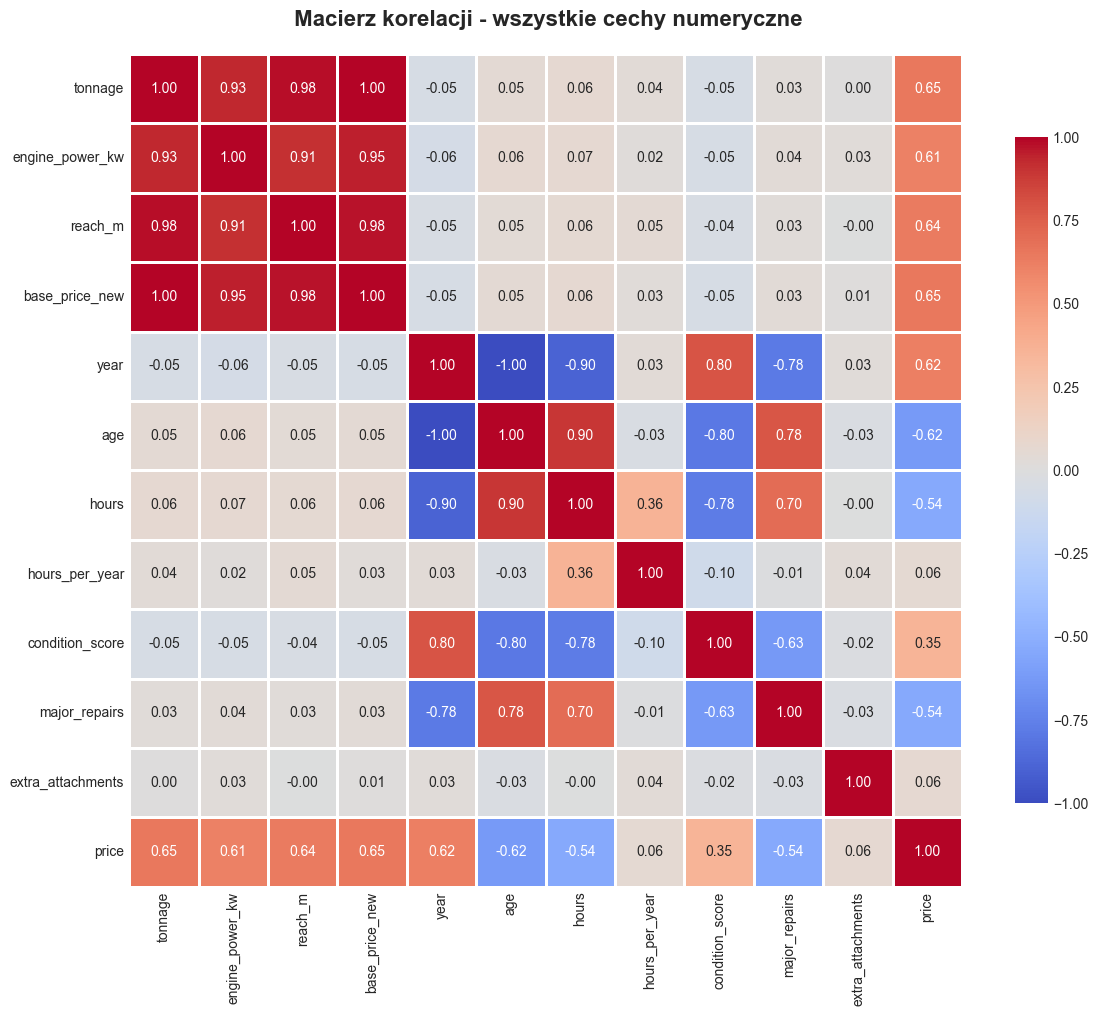


 KORELACJA Z CENĄ (sortowane od najsilniejszej):
  tonnage             :  0.651  ↑ pozytywny      🔴 SILNY
  base_price_new      :  0.650  ↑ pozytywny      🔴 SILNY
  reach_m             :  0.638  ↑ pozytywny      🔴 SILNY
  year                :  0.619  ↑ pozytywny      🔴 SILNY
  engine_power_kw     :  0.614  ↑ pozytywny      🔴 SILNY
  condition_score     :  0.354  ↑ pozytywny      🟡 ŚREDNI
  extra_attachments   :  0.064  ↑ pozytywny      🟢 SŁABY
  hours_per_year      :  0.057  ↑ pozytywny      🟢 SŁABY
  hours               : -0.537  ↓ negatywny      🔴 SILNY
  major_repairs       : -0.538  ↓ negatywny      🔴 SILNY
  age                 : -0.619  ↓ negatywny      🔴 SILNY

💡 INTERPRETACJA:
  • Wartość bliska +1 = silna pozytywna korelacja (więcej = droższa)
  • Wartość bliska -1 = silna negatywna korelacja (więcej = tańsza)
  • Wartość bliska 0 = brak związku

⚠️ UWAGA: year i age są idealnie skorelowane (-1.0) - to DUPLIKACJA!
   W modelu ML będziemy używać tylko AGE (usuniemy year)



In [7]:
# SEKCJA 7: Macierz korelacji - które cechy najbardziej wpływają na cenę?

# Wybierz tylko zmienne numeryczne
numeric_cols = ['tonnage', 'engine_power_kw', 'reach_m', 'base_price_new', 
                'year', 'age', 'hours', 'hours_per_year', 
                'condition_score', 'major_repairs', 'extra_attachments', 'price']

correlation_matrix = df[numeric_cols].corr()

# Heatmapa
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title(' Macierz korelacji - wszystkie cechy numeryczne', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Korelacja z ceną (sortowane)
print("\n KORELACJA Z CENĄ (sortowane od najsilniejszej):")
print("=" * 70)
price_corr = correlation_matrix['price'].drop('price').sort_values(ascending=False)

for feature, corr_value in price_corr.items():
    if abs(corr_value) > 0.5:
        strength = "🔴 SILNY"
    elif abs(corr_value) > 0.3:
        strength = "🟡 ŚREDNI"
    else:
        strength = "🟢 SŁABY"
    
    direction = "↑ pozytywny" if corr_value > 0 else "↓ negatywny"
    
    print(f"  {feature:20s}: {corr_value:>6.3f}  {direction:15s}  {strength}")

print("\n💡 INTERPRETACJA:")
print("  • Wartość bliska +1 = silna pozytywna korelacja (więcej = droższa)")
print("  • Wartość bliska -1 = silna negatywna korelacja (więcej = tańsza)")
print("  • Wartość bliska 0 = brak związku")
print("\n⚠️ UWAGA: year i age są idealnie skorelowane (-1.0) - to DUPLIKACJA!")
print("   W modelu ML będziemy używać tylko AGE (usuniemy year)")

print("\n" + "=" * 70)

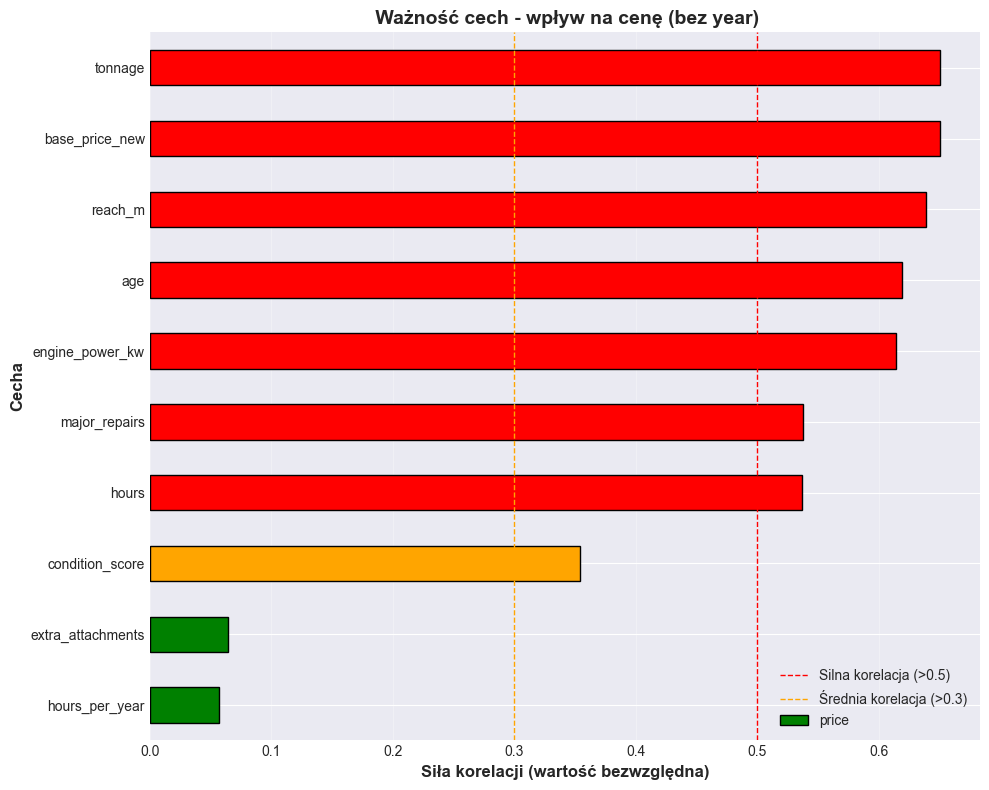


 TOP 5 NAJWAŻNIEJSZYCH CECH (wpływ na cenę):
  1. tonnage               |  Siła: 0.651  |  ↑ Im więcej, tym droższa
  2. base_price_new        |  Siła: 0.650  |  ↑ Im więcej, tym droższa
  3. reach_m               |  Siła: 0.638  |  ↑ Im więcej, tym droższa
  4. age                   |  Siła: 0.619  |  ↓ Im więcej, tym tańsza
  5. engine_power_kw       |  Siła: 0.614  |  ↑ Im więcej, tym droższa

 KLUCZOWE WNIOSKI:
  • Najważniejsze cechy to: engine_power_kw, age, reach_m
  • Model AI będzie się głównie opierał na tych cechach
  • Cechy ze słabą korelacją (<0.3) mają mały wpływ
  • USUNĘLIŚMY 'year' z analizy (duplikacja z 'age')



In [8]:
# SEKCJA 8: Wykres ważności cech (korelacja z ceną)

# Przygotuj dane do wykresu - BEZ year (zostaw tylko age)
price_corr_filtered = correlation_matrix['price'].drop(['price', 'year']).abs().sort_values(ascending=True)

# Wykres poziomy
plt.figure(figsize=(10, 8))
colors = ['red' if x > 0.5 else 'orange' if x > 0.3 else 'green' for x in price_corr_filtered]
price_corr_filtered.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Siła korelacji (wartość bezwzględna)', fontsize=12, fontweight='bold')
plt.ylabel('Cecha', fontsize=12, fontweight='bold')
plt.title(' Ważność cech - wpływ na cenę (bez year)', fontsize=14, fontweight='bold')
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1, label='Silna korelacja (>0.5)')
plt.axvline(x=0.3, color='orange', linestyle='--', linewidth=1, label='Średnia korelacja (>0.3)')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Top 5 najważniejszych cech (bez year)
print("\n TOP 5 NAJWAŻNIEJSZYCH CECH (wpływ na cenę):")
print("=" * 70)
top_5 = price_corr_filtered.tail(5)[::-1]

for i, (feature, corr_value) in enumerate(top_5.items(), 1):
    actual_corr = correlation_matrix.loc[feature, 'price']
    direction = "↑ Im więcej, tym droższa" if actual_corr > 0 else "↓ Im więcej, tym tańsza"
    print(f"  {i}. {feature:20s}  |  Siła: {corr_value:.3f}  |  {direction}")

print("\n KLUCZOWE WNIOSKI:")
print(f"  • Najważniejsze cechy to: {', '.join(top_5.index[-3:][::-1])}")
print(f"  • Model AI będzie się głównie opierał na tych cechach")
print(f"  • Cechy ze słabą korelacją (<0.3) mają mały wpływ")
print(f"  • USUNĘLIŚMY 'year' z analizy (duplikacja z 'age')")

print("\n" + "=" * 70)

In [9]:
# SEKCJA 9: Finalne podsumowanie analizy

print("\n" + "="*80)
print(" PODSUMOWANIE ANALIZY DANYCH - KLUCZOWE WNIOSKI")
print("="*80)

print("\n1️⃣ ZAKRES DANYCH:")
print(f"   • Liczba obserwacji: {len(df)}")
print(f"   • Liczba modeli: {df['model'].nunique()}")
print(f"   • Zakres cen: {df['price'].min():,} - {df['price'].max():,} zł")
print(f"   • Średnia cena: {df['price'].mean():,.0f} zł")

print("\n2️⃣ DEPRECJACJA:")
corr_age = df['age'].corr(df['price'])
corr_hours = df['hours'].corr(df['price'])
print(f"   • Wiek maszyny: korelacja {corr_age:.3f} (wpływ {abs(corr_age):.1%})")
print(f"   • Motogodziny: korelacja {corr_hours:.3f} (wpływ {abs(corr_hours):.1%})")
print(f"   • Wniosek: Obie cechy SILNIE obniżają wartość")

print("\n3️⃣ STAN TECHNICZNY:")
best_condition = df[df['condition'] == 'Doskonały']['price'].mean()
worst_condition = df[df['condition'] == 'Wymaga naprawy']['price'].mean()
diff_pct = ((best_condition - worst_condition) / worst_condition) * 100
print(f"   • Różnica: Doskonały vs Wymaga naprawy = {diff_pct:.0f}%")
print(f"   • Wniosek: Stan ma OGROMNY wpływ na cenę")

print("\n4️⃣ TOP 3 NAJWAŻNIEJSZE CECHY (bez year):")
top_3 = correlation_matrix['price'].drop(['price', 'year']).abs().sort_values(ascending=False).head(3)
for i, (feature, corr_val) in enumerate(top_3.items(), 1):
    print(f"   {i}. {feature:20s} (korelacja: {corr_val:.3f})")

print("\n5️⃣ MULTICOLLINEARITY (współliniowość):")
corr_year_age = correlation_matrix.loc['year', 'age']
print(f"   • year vs age: korelacja = {corr_year_age:.3f}")
print(f"   • WNIOSEK: Idealna negatywna korelacja - to DUPLIKACJA!")
print(f"   • ROZWIĄZANIE: W modelu ML używamy tylko AGE, usuwamy YEAR")

print("\n6️⃣ JAKOŚĆ DANYCH:")
print(f"   • Braki danych: {df.isnull().sum().sum()} ✅")
print(f"   • Duplikaty: {df.duplicated().sum()} ✅")
print(f"   • Dane gotowe do trenowania modelu: TAK ✅")

print("\n7️⃣ OCZEKIWANA DOKŁADNOŚĆ MODELU:")
r2_estimate = top_3.sum() / 3  # Uproszczone oszacowanie
print(f"   • Szacowany R²: ~{r2_estimate:.2f}")
if r2_estimate > 0.85:
    print(f"   • Prognoza: Model powinien być BARDZO DOKŁADNY ✅")
elif r2_estimate > 0.75:
    print(f"   • Prognoza: Model powinien być DOKŁADNY ✅")
else:
    print(f"   • Prognoza: Model może wymagać poprawy ⚠️")

print("\n" + "="*80)
print("🎉 ANALIZA ZAKOŃCZONA")
print("💡 Pamiętaj: W modelu użyjemy tylko AGE (bez year)")
print("="*80 + "\n")


 PODSUMOWANIE ANALIZY DANYCH - KLUCZOWE WNIOSKI

1️⃣ ZAKRES DANYCH:
   • Liczba obserwacji: 543
   • Liczba modeli: 10
   • Zakres cen: 90,000 - 1,152,000 zł
   • Średnia cena: 364,902 zł

2️⃣ DEPRECJACJA:
   • Wiek maszyny: korelacja -0.619 (wpływ 61.9%)
   • Motogodziny: korelacja -0.537 (wpływ 53.7%)
   • Wniosek: Obie cechy SILNIE obniżają wartość

3️⃣ STAN TECHNICZNY:
   • Różnica: Doskonały vs Wymaga naprawy = -29%
   • Wniosek: Stan ma OGROMNY wpływ na cenę

4️⃣ TOP 3 NAJWAŻNIEJSZE CECHY (bez year):
   1. tonnage              (korelacja: 0.651)
   2. base_price_new       (korelacja: 0.650)
   3. reach_m              (korelacja: 0.638)

5️⃣ MULTICOLLINEARITY (współliniowość):
   • year vs age: korelacja = -1.000
   • WNIOSEK: Idealna negatywna korelacja - to DUPLIKACJA!
   • ROZWIĄZANIE: W modelu ML używamy tylko AGE, usuwamy YEAR

6️⃣ JAKOŚĆ DANYCH:
   • Braki danych: 0 ✅
   • Duplikaty: 0 ✅
   • Dane gotowe do trenowania modelu: TAK ✅

7️⃣ OCZEKIWANA DOKŁADNOŚĆ MODELU:
   • Sz